In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('/content/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


for some reasons, the above data column names are corrupted, so we have change those column names as below:

no need to worry much about it...

In [3]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']

In [4]:
df.columns=col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.info()
#note that we have 1727 examples in our dataset, all are non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
#as 'class' column is our prediction column, so we have check how much different categories are present in that column
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [7]:
df['buying'].value_counts()

med      432
high     432
low      432
vhigh    431
Name: buying, dtype: int64

In [8]:
df['lug_boot'].value_counts()

med      576
big      576
small    575
Name: lug_boot, dtype: int64

In [9]:
df['maint'].value_counts()

med      432
high     432
low      432
vhigh    431
Name: maint, dtype: int64

In [10]:
df['doors'].value_counts()

5more    432
3        432
4        432
2        431
Name: doors, dtype: int64

In [11]:
df['persons'].value_counts()

more    576
4       576
2       575
Name: persons, dtype: int64

In [12]:
df['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

note all above columns value counts, we can clearly observe that all columns are categorical columns
It is not actually needed to convert all columns into one-hot encoding for our decision tree model 
But.........

In [13]:
df.corr()

""


In [14]:
#sns.heatmap(df.corr())

#note above, correlation matrix is empty & heatmap is not founded by function

The fact is that, all our columns are categorical i.e. of object data type.
This is the reason, we cannot perform operations (addition, multiplication) on categorical data
And so that our correlation matrix is empty.
so now we must have to perform one-hot encoding.

In [15]:
df_copy=pd.get_dummies(df)

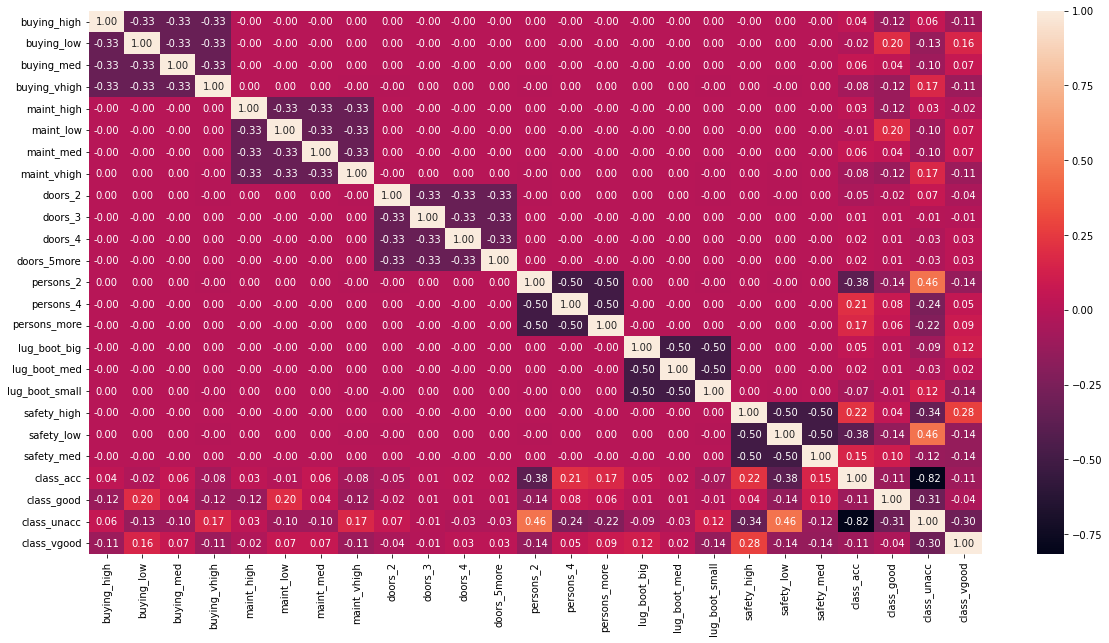

In [16]:
plt.figure(figsize=(20,10))

sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

#now we have to convert our output column i.e. class to one-hot encoding form or some sort of numbers, so that we can compare it easily with our outputs.
Also finding loss function will be made easy.

In [17]:
df['class'] = df['class'].replace({'unacc':0,'acc':1,'good':2,'vgood':3})
#note the data type below, it has changed to int64 now

In [18]:
df_copy=pd.get_dummies(df)


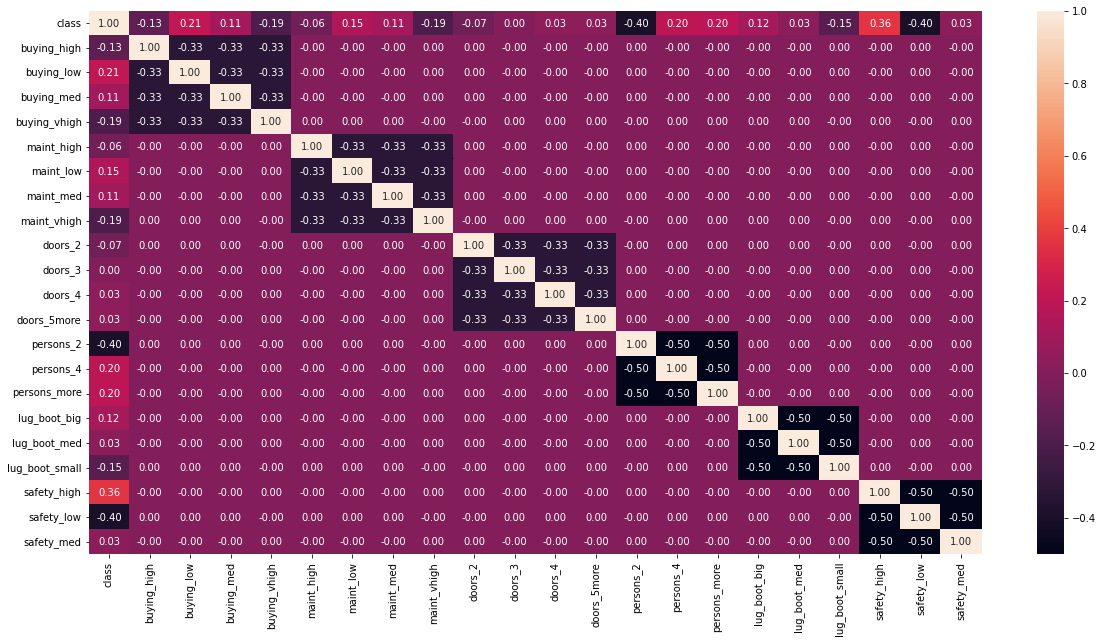

In [19]:
plt.figure(figsize=(20,10))

sns.heatmap(df_copy.corr(),annot=True,fmt='.2f')

note above, there is only one class variable now.
so that we can easily compare with other features.
safety_high is 0.36 correlated with class, safety_low is -0.40 and person_2 is  also -0.40 correlated with class.

Also note door_3 has about 0 correlation with all features, which is good also
so we can drop that feature also.

#Now we are ready to use our decision tree model

In [20]:
y=df_copy['class']
x=df_copy.drop(['class'],axis=1)

In [21]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [22]:
ctree=dtree(max_depth=5)  #creates an empty tree

In [23]:
ctree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
from sklearn import tree

[Text(697.5, 498.3, 'X[19] <= 0.5\ngini = 0.457\nsamples = 1727\nvalue = [1209, 384, 69, 65]'),
 Text(627.75, 407.70000000000005, 'X[12] <= 0.5\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 69, 65]'),
 Text(558.0, 317.1, 'X[3] <= 0.5\ngini = 0.629\nsamples = 768\nvalue = [250, 384, 69, 65]'),
 Text(279.0, 226.5, 'X[0] <= 0.5\ngini = 0.629\nsamples = 576\nvalue = [130, 312, 69, 65]'),
 Text(139.5, 135.89999999999998, 'X[5] <= 0.5\ngini = 0.642\nsamples = 384\nvalue = [46, 204, 69, 65]'),
 Text(69.75, 45.299999999999955, 'gini = 0.546\nsamples = 288\nvalue = [42, 184, 23, 39]'),
 Text(209.25, 45.299999999999955, 'gini = 0.652\nsamples = 96\nvalue = [4, 20, 46, 26]'),
 Text(418.5, 135.89999999999998, 'X[7] <= 0.5\ngini = 0.492\nsamples = 192\nvalue = [84, 108, 0, 0]'),
 Text(348.75, 45.299999999999955, 'gini = 0.375\nsamples = 144\nvalue = [36, 108, 0, 0]'),
 Text(488.25, 45.299999999999955, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0, 0]'),
 Text(837.0, 226.5, 'X[6] <= 0.5\ngini = 0

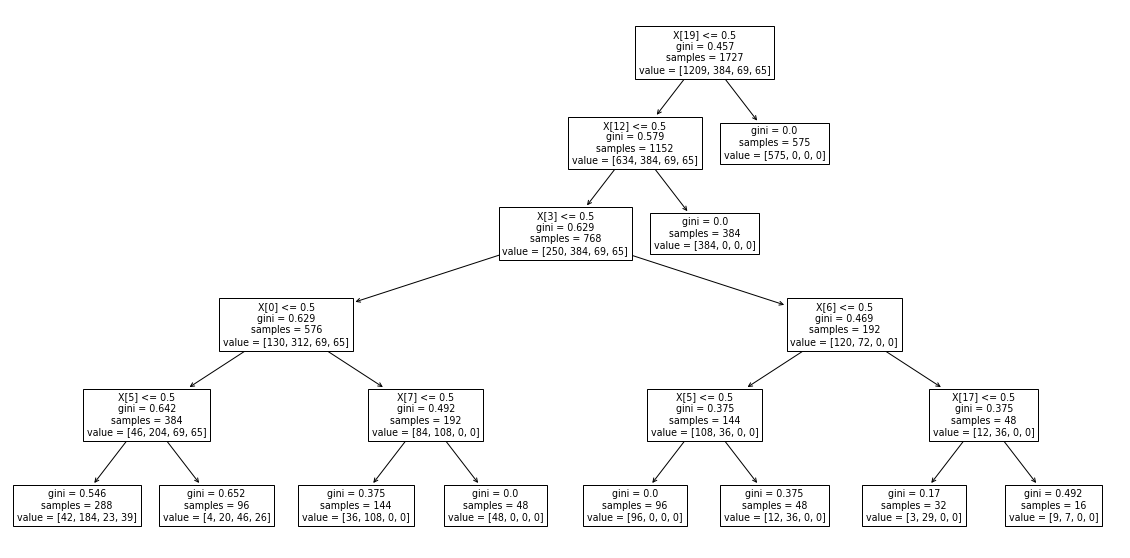

In [25]:
plt.figure(figsize=(20,10))

tree.plot_tree(ctree.fit(x,y))

In [26]:
x.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0


#notice above tree carefully:
1) we have first X[12] is as decision node which is actually correct as well, because at 12th index column is doors_2 which is -0.40 correlated with class column in correlation matrix.

*) Similary x[19] is safety_low column.

*) So the tree has arrange all decesion nodes very correctly basis on our max_depth of the tree.


2) notice the threshold value on each decision nodes. It is either 0.0 or 0.5 maximum times which is also correct. As 0.0 is min and 0.5 is mean of the range (0,1). Because we have performed one-hot encoding on that column.

3) notice the 'samples' values and 'values',
in last node samples=48 and values=[48,0,0,0].
i.e. there are total 48 examples checking for that node condition & out of 48, all 48 follows in '0' category i.e. unacceptable category and 0 examples follows in category 1,2 & 3(acc,good,vgood).

Similarly for X[0] <=0.5, samples=576 and values=[130,312,69,65].


4) note down the leaf nodes in above tree i.e. nodes having samples 48,384, 575, all these leaft nodes' samples values are belonging to only one category like [48,0,0,0], [384,0,0,0],...  It means that all these are reached to their exit position i.e. these are belonging to only one of the category at the end.
5) No more training to these nodes needed
6) But we have set the max_Depth to 4 only
7) So that all other nodes need further training
8) we can do this by increasing our max_depth............

In [27]:
preds=ctree.predict(x)

#finding accuracy

sum(preds==y)/len(preds) #accuracy=80% for max_depth==4
                          #accuracy=87% for max_Depth ==5

0.8772437753329473

In [28]:
#if we perform splitting on our data

from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

[Text(780.375, 524.1857142857143, 'X[12] <= 0.5\ngini = 0.457\nsamples = 1381\nvalue = [967, 307, 55, 52]'),
 Text(768.375, 485.3571428571429, 'X[19] <= 0.5\ngini = 0.581\nsamples = 916\nvalue = [502, 307, 55, 52]'),
 Text(756.375, 446.52857142857147, 'X[7] <= 0.5\ngini = 0.629\nsamples = 618\nvalue = [204, 307, 55, 52]'),
 Text(528.75, 407.70000000000005, 'X[1] <= 0.5\ngini = 0.626\nsamples = 466\nvalue = [105, 254, 55, 52]'),
 Text(334.5, 368.8714285714286, 'X[17] <= 0.5\ngini = 0.554\nsamples = 354\nvalue = [100, 212, 19, 23]'),
 Text(177.0, 330.0428571428572, 'X[2] <= 0.5\ngini = 0.511\nsamples = 237\nvalue = [42, 158, 14, 23]'),
 Text(102.0, 291.2142857142857, 'X[4] <= 0.5\ngini = 0.38\nsamples = 153\nvalue = [39, 114, 0, 0]'),
 Text(60.0, 252.3857142857143, 'X[8] <= 0.5\ngini = 0.192\nsamples = 102\nvalue = [11, 91, 0, 0]'),
 Text(36.0, 213.55714285714288, 'X[9] <= 0.5\ngini = 0.077\nsamples = 75\nvalue = [3, 72, 0, 0]'),
 Text(24.0, 174.72857142857146, 'gini = 0.0\nsamples = 51\

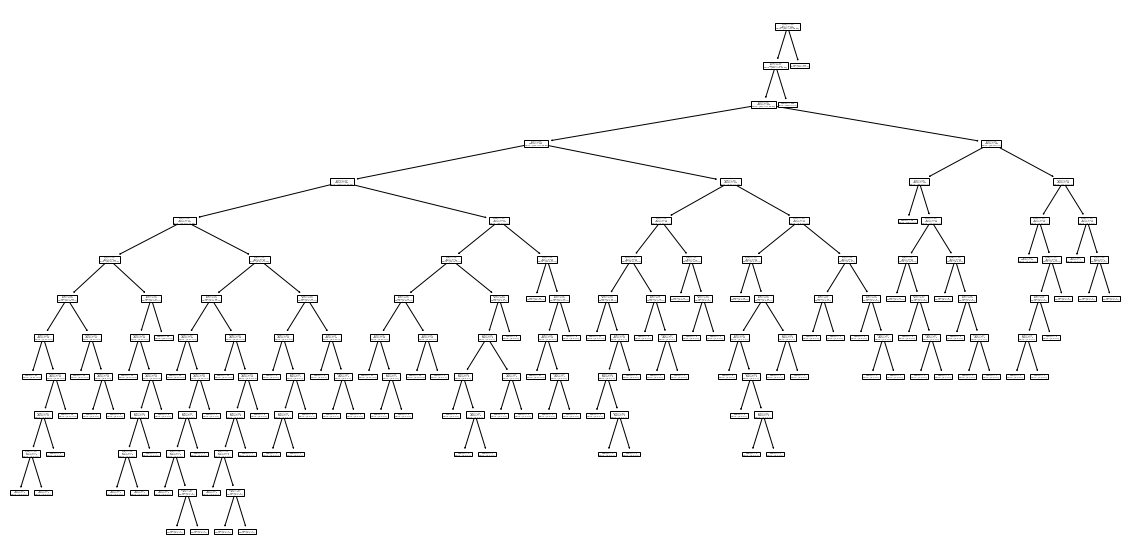

In [30]:
plt.figure(figsize=(20,10))

#ctree=dtree(max_depth=5)

ctree=dtree()

tree.plot_tree(ctree.fit(x_train,y_train))

In [31]:
preds=ctree.predict(x_test)

sum(preds==y_test)/len(preds)   

0.9624277456647399

In [32]:
preds=ctree.predict(x_train)

sum(preds==y_train)/len(preds)    

1.0

So the model is neither overfitting & underfitting if max_depth==5
#test accuracy = 87%

#training accuracy = 85%

note above when max_depth is by default of our model, then
#training accuracy=100%  (so it is some extent to overfitting)
#and test accuracy=95%